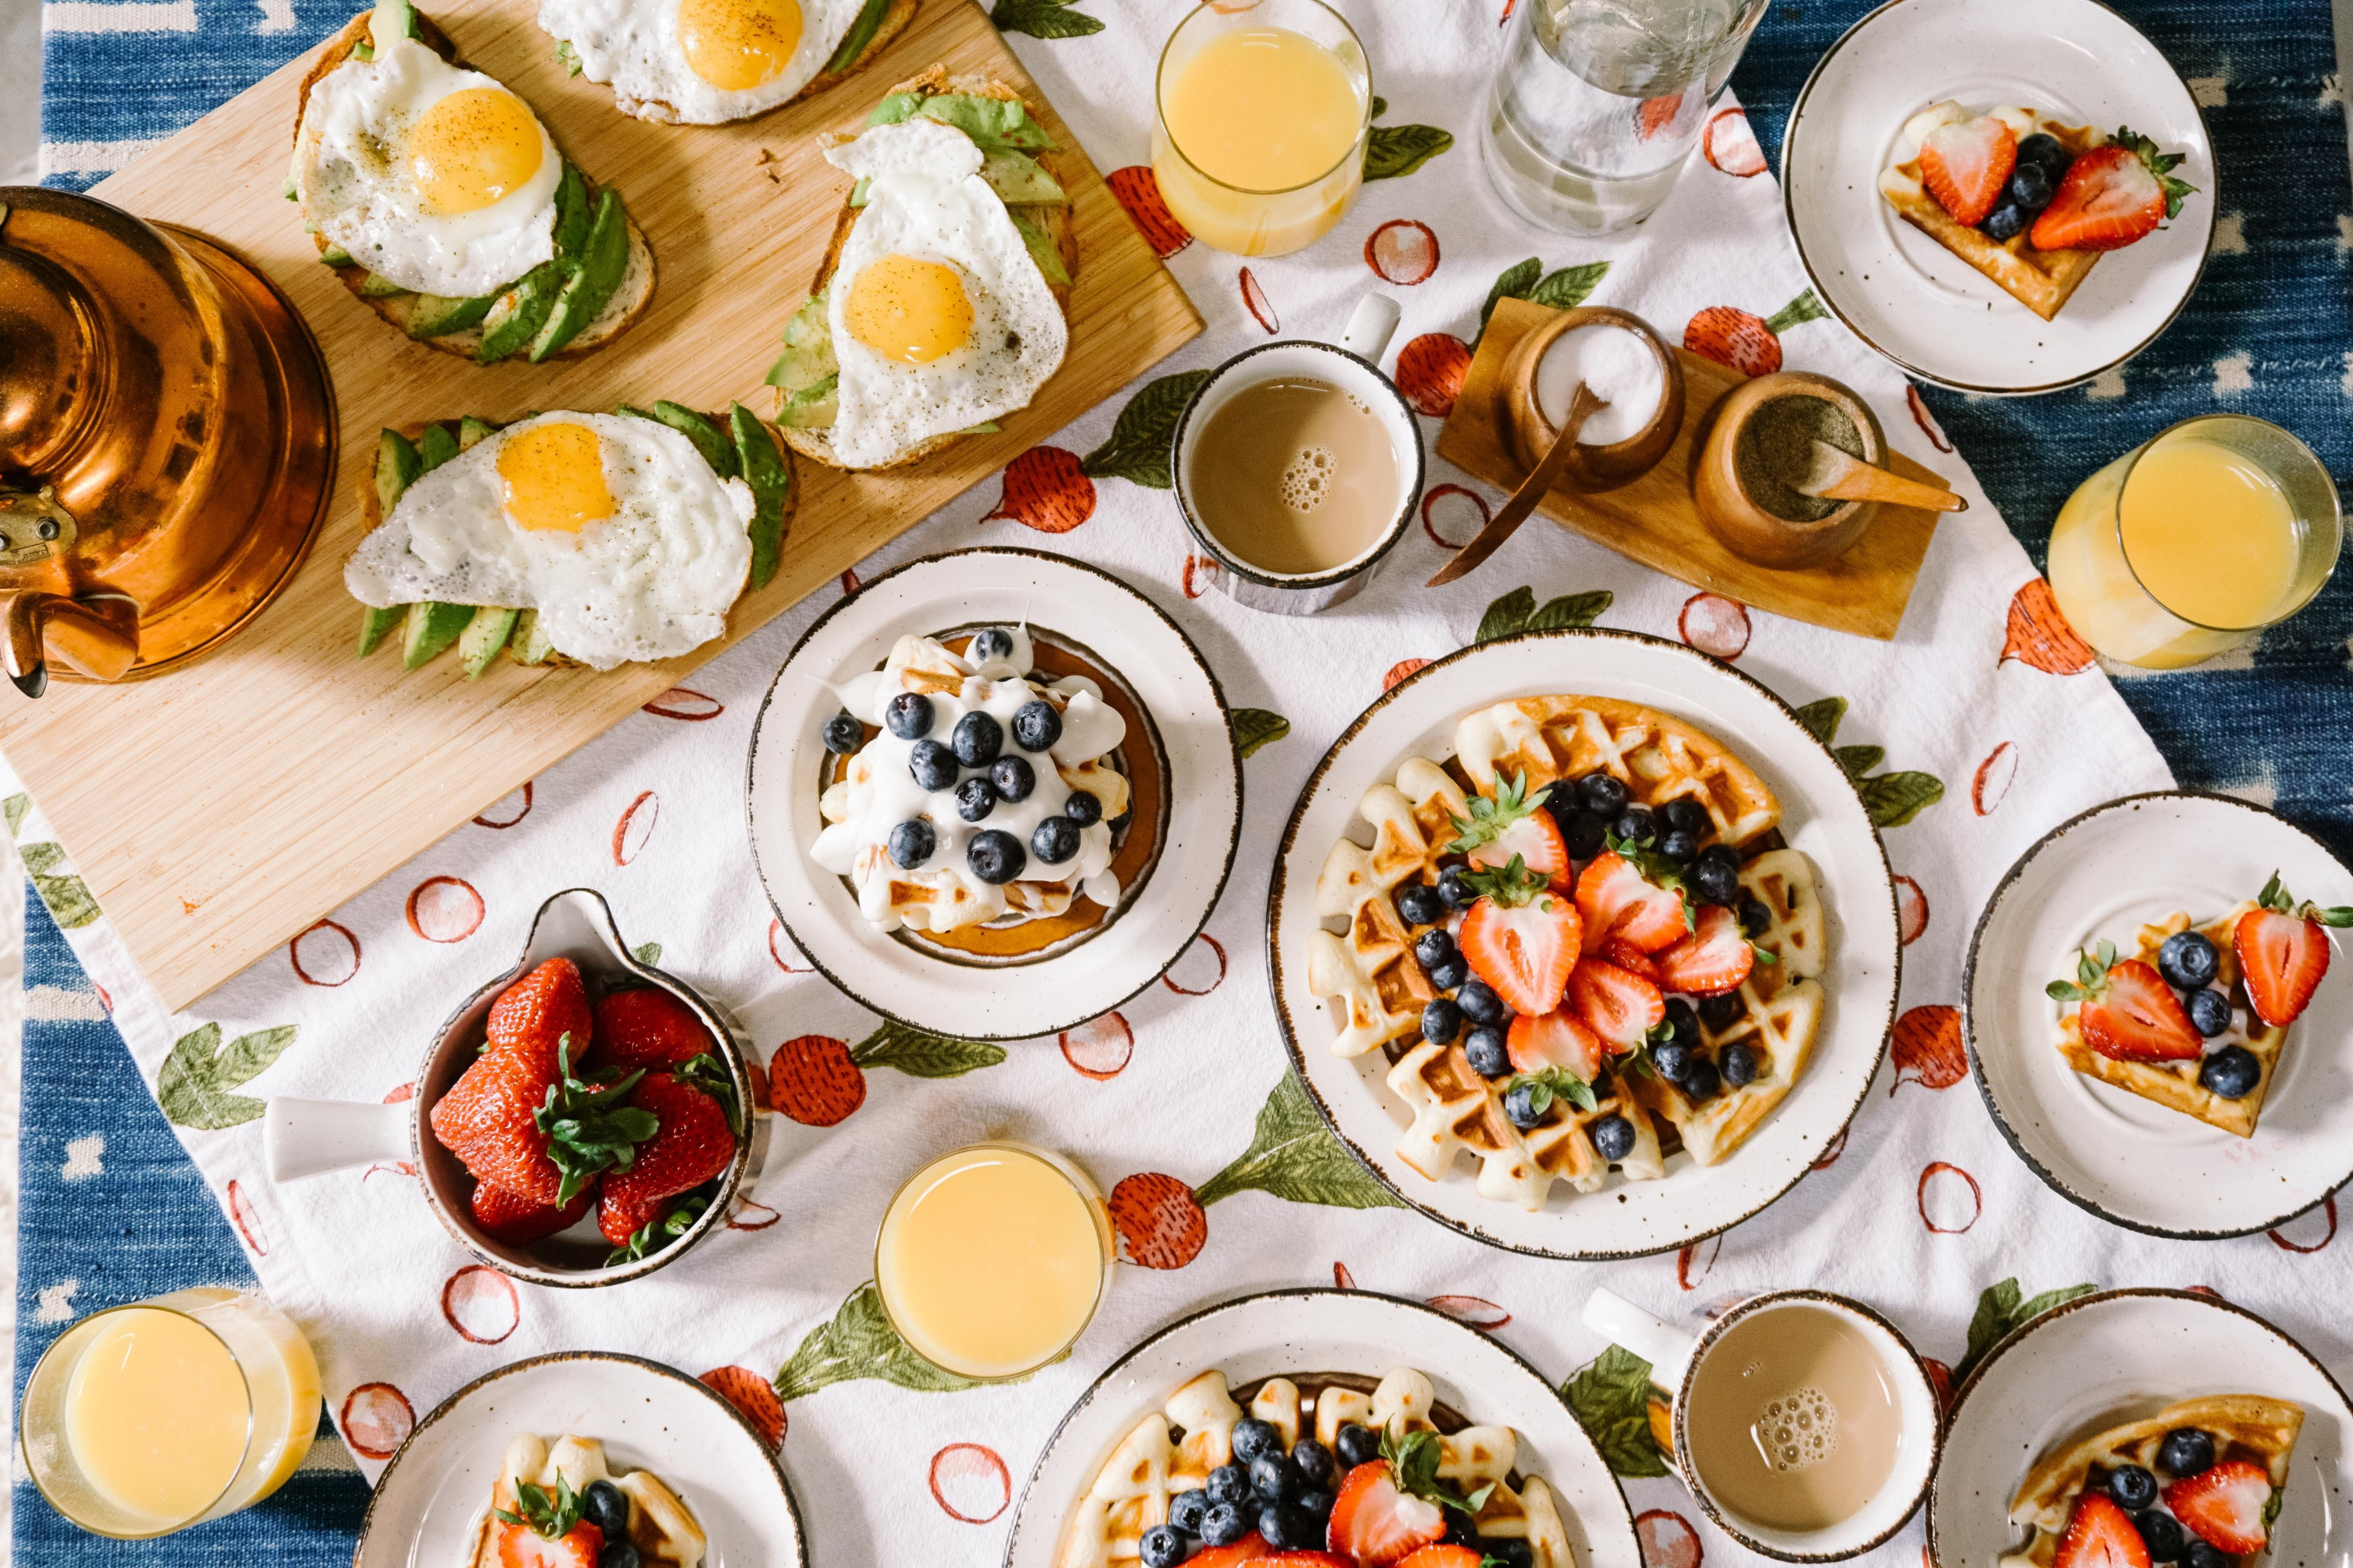

### Lauro Cesar Ribeiro

## How the Restaurant Recommendation System Works?

The rapid growth in data collection has led to a new era of a data-driven world. Data is used to create more efficient systems and that’s where recommender systems come in.

Recommendation systems are a type of information filtering systems because they improve the quality of search results and provide elements that are more relevant to the search item or that are related to the search history of the user.

These are active information filtering systems that personalize the information provided to a user based on their interests, relevance of the information, etc. Recommendation systems are widely used to recommend movies, items, restaurants, places to visit, items to buy, etc.

There are two types of recommendation systems:

 - Content-based filtering
 - Collaborative filtering

A Restaurant recommendation system uses content-based filtering. This method only uses information about the description and attributes of items that users have previously consumed to model user preferences.

In other words, these algorithms try to recommend things similar to what a user liked in the past. The dataset I’ll be using here consists of restaurants in Bangalore, India, collected from Zomato.

To create the Restaurant recommendation system, I will create a content-based recommendation system where when I enter the name of a restaurant, the Restaurant recommendation system will look at reviews from other restaurants, and System will recommend us to the other restaurants with similar reviews and sort them from the top-rated.

In [9]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import re
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [10]:
zomato_real=pd.read_csv("zomato.csv")
zomato_real.head() 

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
zomato_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

Now the next step is data cleaning and feature engineering for this step we need to do a lot of stuff with the data such as:

 - Deleting Unnecessary Columns
 - Removing the Duplicates
 - Remove the NaN values from the dataset
 - Changing the column names
 - Data Transformations
 - Data Cleaning
 - Adjust the column names

In [3]:
#Deleting Unnnecessary Columns
zomato=zomato_real.drop(['url','dish_liked','phone'],axis=1) #Dropping the column "dish_liked", "phone", "url" and saving the new dataset as "zomato"

#Removing the Duplicates
zomato.duplicated().sum()
zomato.drop_duplicates(inplace=True)

#Remove the NaN values from the dataset
zomato.isnull().sum()
zomato.dropna(how='any',inplace=True)

#Changing the column names
zomato = zomato.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type', 'listed_in(city)':'city'})

#Some Transformations
zomato['cost'] = zomato['cost'].astype(str) #Changing the cost to string
zomato['cost'] = zomato['cost'].apply(lambda x: x.replace(',','.')) #Using lambda function to replace ',' from cost
zomato['cost'] = zomato['cost'].astype(float)
#Removing '/5' from Rates
zomato = zomato.loc[zomato.rate !='NEW']
zomato = zomato.loc[zomato.rate !='-'].reset_index(drop=True)
remove_slash = lambda x: x.replace('/5', '') if type(x) == np.str else x
zomato.rate = zomato.rate.apply(remove_slash).str.strip().astype('float')

# Adjust the column names
zomato.name = zomato.name.apply(lambda x:x.title())
zomato.online_order.replace(('Yes','No'),(True, False),inplace=True)
zomato.book_table.replace(('Yes','No'),(True, False),inplace=True)

## Computing Mean Rating
restaurants = list(zomato['name'].unique())
zomato['Mean Rating'] = 0

for i in range(len(restaurants)):
    zomato['Mean Rating'][zomato['name'] == restaurants[i]] = zomato['rate'][zomato['name'] == restaurants[i]].mean()
    
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (1,5))
zomato[['Mean Rating']] = scaler.fit_transform(zomato[['Mean Rating']]).round(2)

Now the next step is to perform some text preprocessing steps which include:

 - Lower casing
 - Removal of Punctuations
 - Removal of Stopwords
 - Removal of URLs
 - Spelling correction

In [4]:
## Lower Casing
zomato["reviews_list"] = zomato["reviews_list"].str.lower()

## Removal of Puctuations
import string
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_punctuation(text))

## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    """custom function to remove the stopwords"""
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_stopwords(text))

## Removal of URLS
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

zomato["reviews_list"] = zomato["reviews_list"].apply(lambda text: remove_urls(text))

zomato[['reviews_list', 'cuisines']].sample(5)

,reviews_list,cuisines
4932,rated 50 ratedn kool place today noon time fri...,"Cafe, Continental, American, Burger"
15648,rated 30 ratedn chettys corner great place dec...,"Fast Food, Burger"
40733,rated 40 ratedn canãx83ãx83ãx82ãx83ãx83ã...,"Hyderabadi, Andhra, North Indian, Chinese, Sou..."
28089,rated 40 ratedn visited restaurant occasion sa...,Bengali
17650,rated 30 ratedn wanted try restaurant serving ...,"Chinese, Thai, Seafood, North Indian, Momos"


In [5]:
# RESTAURANT NAMES:
restaurant_names = list(zomato['name'].unique())
def get_top_words(column, top_nu_of_words, nu_of_word):
    vec = CountVectorizer(ngram_range= nu_of_word, stop_words='english')
    bag_of_words = vec.fit_transform(column)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:top_nu_of_words]
    
zomato=zomato.drop(['address','rest_type', 'type', 'menu_item', 'votes'],axis=1)
import pandas

# Randomly sample 60% of your dataframe
df_percent = zomato.sample(frac=0.5)

## TF-IDF Vectorization

TF-IDF (Term Frequency-Inverse Document Frequency) vectors for each document. This will give you a matrix where each column represents a word in the general vocabulary (all words that appear in at least one document) and each column represents a restaurant, as before.

TF-IDF is the statistical method of assessing the meaning of a word in a given document. Now, I will use the TF-IDF vectorization on the dataset

In [6]:
df_percent.set_index('name', inplace=True)
indices = pd.Series(df_percent.index)

# Creating tf-idf matrix
tfidf = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), min_df=0, stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_percent['reviews_list'])

cosine_similarities = linear_kernel(tfidf_matrix, tfidf_matrix)

In [7]:
def recommend(name, cosine_similarities = cosine_similarities):
    
    # Create a list to put top restaurants
    recommend_restaurant = []
    
    # Find the index of the hotel entered
    idx = indices[indices == name].index[0]
    
    # Find the restaurants with a similar cosine-sim value and order them from bigges number
    score_series = pd.Series(cosine_similarities[idx]).sort_values(ascending=False)
    
    # Extract top 30 restaurant indexes with a similar cosine-sim value
    top30_indexes = list(score_series.iloc[0:31].index)
    
    # Names of the top 30 restaurants
    for each in top30_indexes:
        recommend_restaurant.append(list(df_percent.index)[each])
    
    # Creating the new data set to show similar restaurants
    df_new = pd.DataFrame(columns=['cuisines', 'Mean Rating', 'cost'])
    
    # Create the top 30 similar restaurants with some of their columns
    for each in recommend_restaurant:
        df_new = df_new.append(pd.DataFrame(df_percent[['cuisines','Mean Rating', 'cost']][df_percent.index == each].sample()))
    
    # Drop the same named restaurants and sort only the top 10 by the highest rating
    df_new = df_new.drop_duplicates(subset=['cuisines','Mean Rating', 'cost'], keep=False)
    df_new = df_new.sort_values(by='Mean Rating', ascending=False).head(10)
    
    print('TOP %s RESTAURANTS LIKE %s WITH SIMILAR REVIEWS: ' % (str(len(df_new)), name))
    
    return df_new
recommend('Pai Vihar')

TOP 7 RESTAURANTS LIKE Pai Vihar WITH SIMILAR REVIEWS: 


,cuisines,Mean Rating,cost
Cinnamon,"North Indian, Asian, Continental",3.62,1.0
New Friends,"North Indian, Continental, Chinese, Steak",3.58,900.0
Shanthi Sagar,"South Indian, North Indian, Chinese",3.44,400.0
Shanthi Sagar,"South Indian, North Indian, Chinese, Juices",3.44,250.0
Cafe Mondo,"Cafe, Italian, Beverages",3.39,600.0
The Diner,"North Indian, Chinese, Andhra, Biryani",3.32,700.0
Container Coffee,South Indian,3.11,200.0
